# Import

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Mencari Missing Values dan Pembersihan Data

In [11]:
namaKolom = ['rank','number','interval']

filePath = '1mm.csv'
data = pd.read_csv(filePath, header=None, names=namaKolom, skiprows=1, skipinitialspace=True, encoding='utf-8')

for kolom in data.columns:
    data[kolom] = pd.to_numeric(data[kolom], errors='coerce')

print("fitur yang tidak memiliki nilai:")
print(data.isnull().sum())
print("\nUkuran Dataset:")
print(data.shape)

data.dropna(inplace=True)

print("\nsetelah pembersihan dataset:")
print(data.isnull().sum())
print("\nUkuran Dataset:")
print(data.shape)

fitur yang tidak memiliki nilai:
rank        0
number      2
interval    3
dtype: int64

Ukuran Dataset:
(999999, 3)

setelah pembersihan dataset:
rank        0
number      0
interval    0
dtype: int64

Ukuran Dataset:
(999995, 3)


# Visualisasi

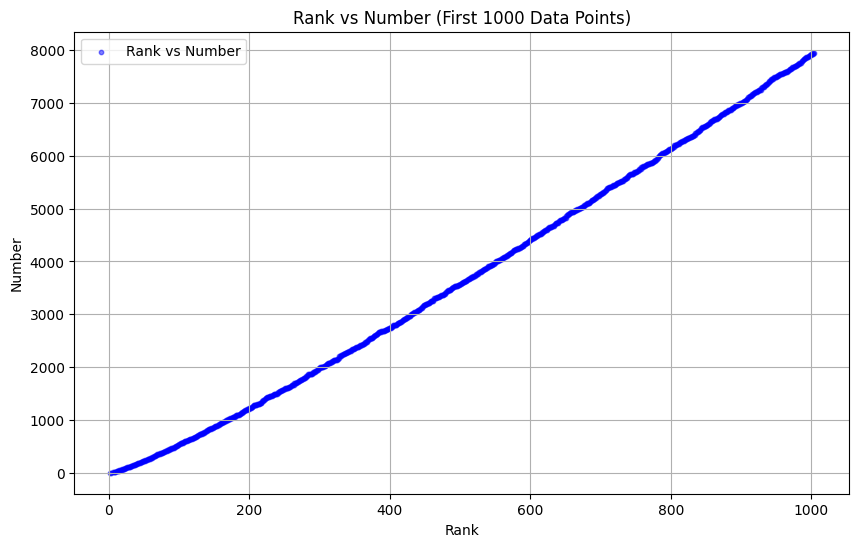

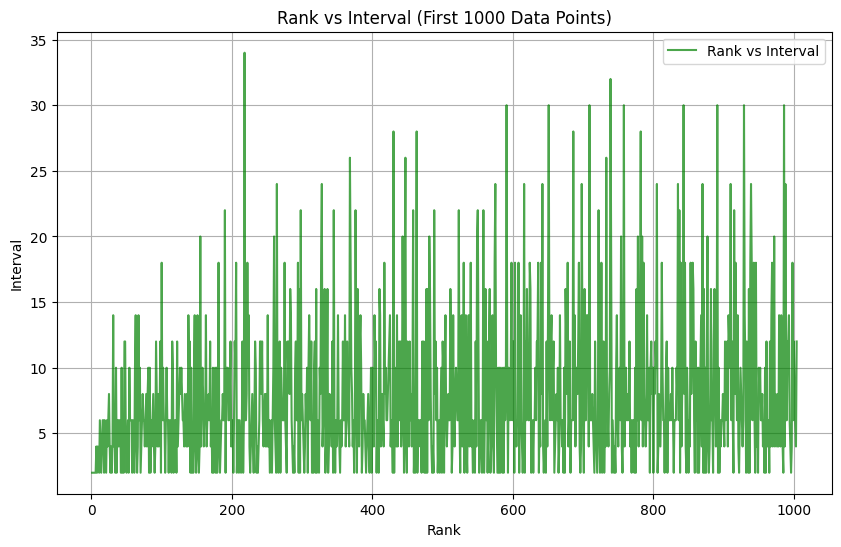

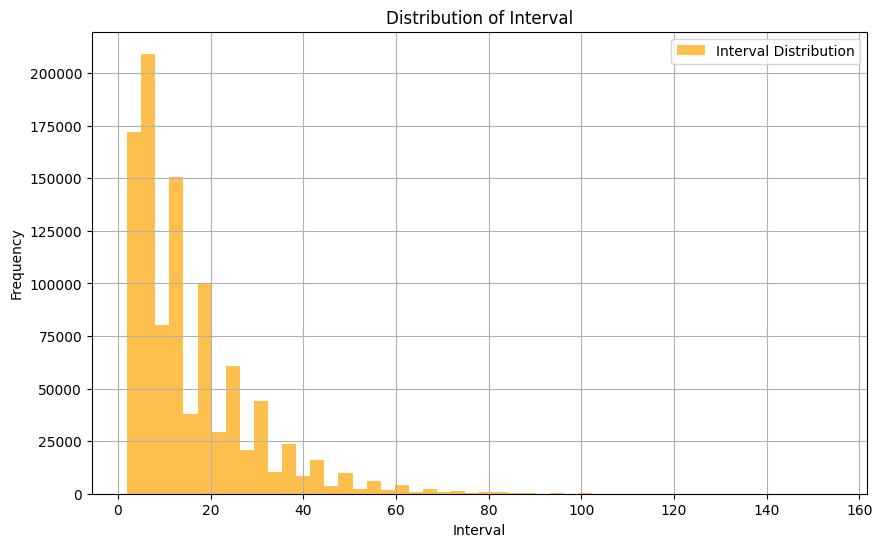

In [12]:
# Visualize: Rank vs Number (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(data['rank'][:1000], data['number'][:1000], alpha=0.5, s=10, c='blue', label='Rank vs Number')
plt.title('Rank vs Number (First 1000 Data Points)')
plt.xlabel('Rank')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.show()

# Visualize: Rank vs Interval (line plot)
plt.figure(figsize=(10, 6))
plt.plot(data['rank'][:1000], data['interval'][:1000], alpha=0.7, label='Rank vs Interval', color='green')
plt.title('Rank vs Interval (First 1000 Data Points)')
plt.xlabel('Rank')
plt.ylabel('Interval')
plt.legend()
plt.grid(True)
plt.show()

# Visualize: Number vs Interval (histogram)
plt.figure(figsize=(10, 6))
plt.hist(data['interval'], bins=50, alpha=0.7, color='orange', label='Interval Distribution')
plt.title('Distribution of Interval')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Melatih Model Menggunakan Random Forest Clasifier

In [14]:
X = data.drop('interval', axis=1)
y = data['interval']


xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

klasifierRF = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42, class_weight='balanced')
klasifierRF.fit(xTrainScaled, yTrain)

yPred = klasifierRF.predict(xTestScaled)
print("\nLaporan Klasifikasi:")
print(classification_report(yTest, yPred))



Laporan Klasifikasi:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

         2.0       0.09      0.08      0.09     17207
         4.0       0.10      0.07      0.08     17396
         6.0       0.16      0.01      0.02     29269
         8.0       0.07      0.00      0.00     12459
        10.0       0.10      0.00      0.00     15952
        12.0       0.00      0.00      0.00     19820
        14.0       0.00      0.00      0.00     10616
        16.0       0.00      0.00      0.00      7483
        18.0       0.00      0.00      0.00     13358
        20.0       0.00      0.00      0.00      6615
        22.0       0.00      0.00      0.00      5771
        24.0       0.00      0.00      0.00      8311
        26.0       0.00      0.00      0.00      3841
        28.0       0.04      0.00      0.00      4172
        30.0       0.00      0.00      0.00      6756
        32.0       0.02      0.00      0.00      2047
        34.0       0.05      0.00      0.00      2150
        36.0       0.05    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Kontribusi Tiap Fitur


Kontribusi terhadap Akurasi Model:
    fitur  kontribusi
0    rank    0.506521
1  number    0.493479


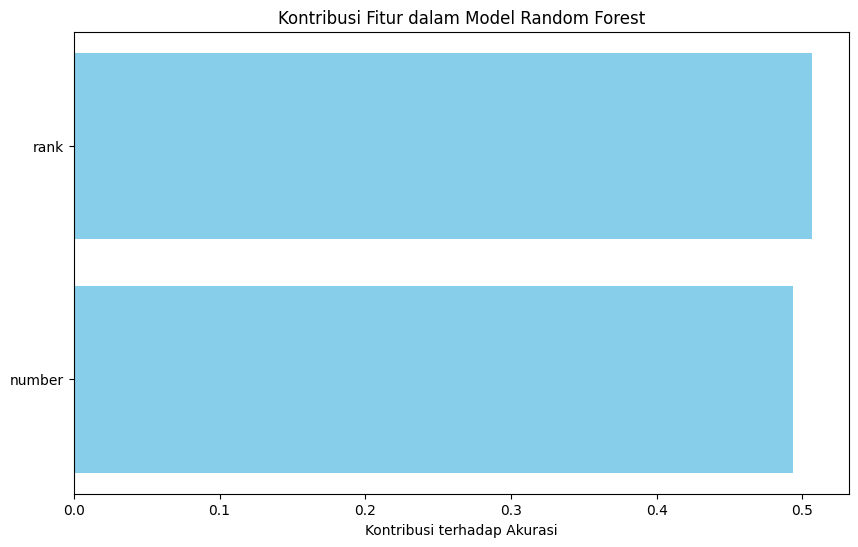

In [15]:
kontribusiFitur = pd.DataFrame({
    'fitur': X.columns,
    'kontribusi': klasifierRF.feature_importances_
}).sort_values('kontribusi', ascending=False)

print("\nKontribusi terhadap Akurasi Model:")
print(kontribusiFitur)

plt.figure(figsize=(10, 6))
plt.barh(kontribusiFitur['fitur'], kontribusiFitur['kontribusi'], color='skyblue')
plt.xlabel('Kontribusi terhadap Akurasi')
plt.title('Kontribusi Fitur dalam Model Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Menghapus Fitur Paling Berpengaruh


In [21]:
kontribusiFitur = pd.DataFrame({
    'fitur': X.columns,
    'kontribusi': klasifierRF.feature_importances_
}).sort_values('kontribusi', ascending=False)

print("Kontribusi terhadap Akurasi Model:")
print(kontribusiFitur)
fiturTerhapus = kontribusiFitur.iloc[0]['fitur']
print(f"\nFitur yang dihapus: {fiturTerhapus}")

XBaru = X.drop(columns=[fiturTerhapus])
xTrainBaru, xTestBaru, yTrainBaru, yTestBaru = train_test_split(XBaru, y, test_size=0.2, random_state=42)
xTrainBaruScaled = scaler.fit_transform(xTrainBaru)
xTestBaruScaled = scaler.transform(xTestBaru)
klasifierRF.fit(xTrainBaruScaled, yTrainBaru)
yPredBaru = klasifierRF.predict(xTestBaruScaled)

print("\nLaporan Klasifikasi Setelah Menghapus Fitur:")
print(classification_report(yTestBaru, yPredBaru))


Kontribusi terhadap Akurasi Model:
    fitur  kontribusi
0    rank    0.506521
1  number    0.493479

Fitur yang dihapus: rank

Laporan Klasifikasi Setelah Menghapus Fitur:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

         2.0       0.09      0.08      0.09     17207
         4.0       0.10      0.07      0.08     17396
         6.0       0.16      0.01      0.02     29269
         8.0       0.07      0.00      0.00     12459
        10.0       0.10      0.00      0.00     15952
        12.0       0.00      0.00      0.00     19820
        14.0       0.00      0.00      0.00     10616
        16.0       0.00      0.00      0.00      7483
        18.0       0.00      0.00      0.00     13358
        20.0       0.00      0.00      0.00      6615
        22.0       0.00      0.00      0.00      5771
        24.0       0.50      0.00      0.00      8311
        26.0       0.00      0.00      0.00      3841
        28.0       0.04      0.00      0.00      4172
        30.0       0.00      0.00      0.00      6756
        32.0       0.02      0.00      0.00      2047
        34.0       0.05      0.00      0.00      2150
        36.0       0.05    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
